In [1]:
# !pip install netCDF4
# !pip install cartopy
# !pip install basemap 


In [2]:
import netCDF4 as nc
import os

In [3]:
directories = ["Precipitation", "SEIO", "WTIO"]

In [4]:
import os
# Constructing a relative path to move one directory backward
data_relative_path = os.path.join('..', 'Data','CMIP6')
precipitation_path = os.path.join(data_relative_path,'Precipitation')
WTIO_path = os.path.join(data_relative_path,'WTIO')
SEIO_path = os.path.join(data_relative_path,'SEIO')
ds = nc.Dataset(f"{precipitation_path}/pr_Amon_ACCESS-CM2_historical_r1i1p1f1_gn_19811016-20101016_v20191108.nc")



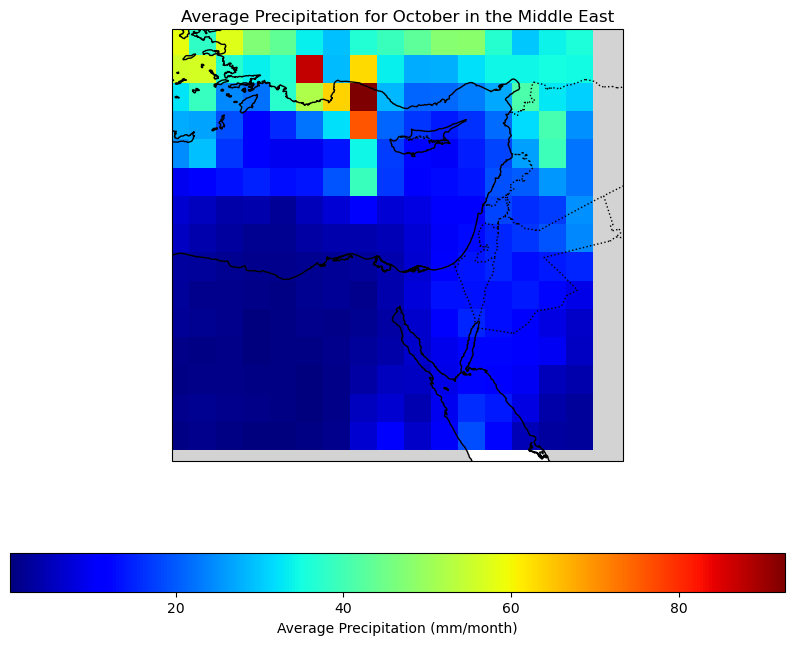

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

data = ds
pr_october = data.variables['pr'][:]

# Select the latitude and longitude range for the Middle East (25°N to 40°N, 25°E to 40°E)
lat = data.variables['lat'][(data.variables['lat'][:] >= 25) & (data.variables['lat'][:] <= 40)]
lon = data.variables['lon'][(data.variables['lon'][:] >= 25) & (data.variables['lon'][:] <= 40)]
avg_pr_middle_east = np.mean(pr_october,axis=0)
convert_unit_to_mm_transform = (86400*31) 
mm_avg_lat_lon = avg_pr_middle_east * convert_unit_to_mm_transform 
# Plot the map with the heatmap overlay
plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([min(lat), max(lat),min(lon),max(lon)], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, color='lightgray')

plt.imshow(mm_avg_lat_lon, origin='lower', cmap='jet', extent=[lon[0], lon[-1], lat[0], lat[-1]],
           transform=ccrs.PlateCarree(), interpolation='nearest')

# Add colorbar
cbar = plt.colorbar(label='Average Precipitation (mm/month)', orientation='horizontal')
cbar.set_label('Average Precipitation (mm/month)')

# Add title
plt.title('Average Precipitation for October in the Middle East')

plt.show()

